In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
from sklearn import set_config
set_config(display="text")  

# 1. 결측치, 이상치, 의미없는 컬럼 처리
- 현재 가지고 있는 데이터에서는 이상치와 결측치가 없고 이상치라 하더라도 그 나라에 해당하는 정확한 값이기에 어떤 방식으로 처리하진 않았다.
- 우리 팀프로젝트에선 기대수명에 미치는 요소들을 분석하여 주어진 데이터를 토대로 기대 수명이 어떤 값이 나오는지 확인시켜주는 프로그램이다.
- 이를 바탕으로 필요없는 데이터 '나라명', '년도', '지역'은 제거하고 진행할 생각이다.

In [93]:
# 의미없는 컬럼 제거
data = pd.read_csv('./data/Life-Expectancy-Data-Averaged.csv')

columns_to_drop = ['Country', 'Region', 'Year']
data = data.drop(columns=columns_to_drop)
data

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,15.85000,18.50000,151.056156,7.458125,72.4375,83.0000,26.49375,79.1875,75.2500,0.400000,9294.8750,27.392500,1.65000,1.56250,8.23750,1.0,72.79375
175,19.50000,24.47500,133.054406,1.742500,87.4375,65.0000,20.76250,94.9375,91.7500,0.196875,1807.8750,86.032500,14.92500,15.62500,6.90000,1.0,74.33125
176,52.44375,69.57500,239.653938,0.047000,60.1875,95.0000,23.02500,71.6250,72.6250,0.025000,2406.8125,21.730625,13.83125,13.75000,2.22500,1.0,64.16250
177,60.58125,99.20625,452.761219,2.903125,82.8750,39.1875,22.00000,82.9375,83.8125,6.868125,1059.8750,12.862500,6.88125,6.76250,6.43750,1.0,52.33125


# 2. EDA

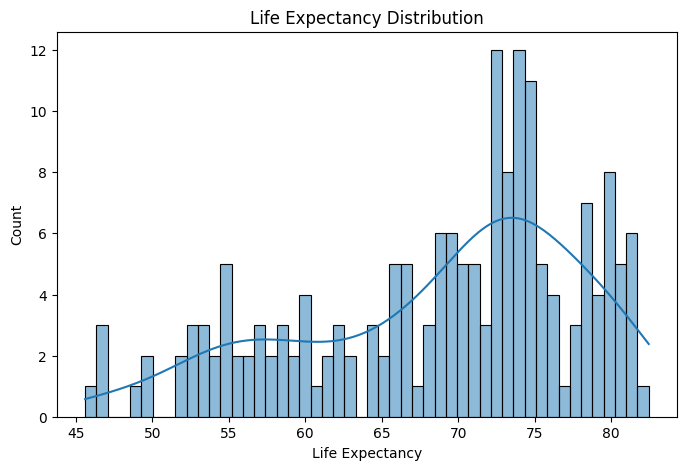

In [94]:
# Life_expectancy 분포 시각화
plt.figure(figsize=(8, 5))
sns.histplot(data['Life_expectancy'], bins=50, kde=True)
plt.title("Life Expectancy Distribution")
plt.xlabel("Life Expectancy")
plt.ylabel("Count")
plt.show()

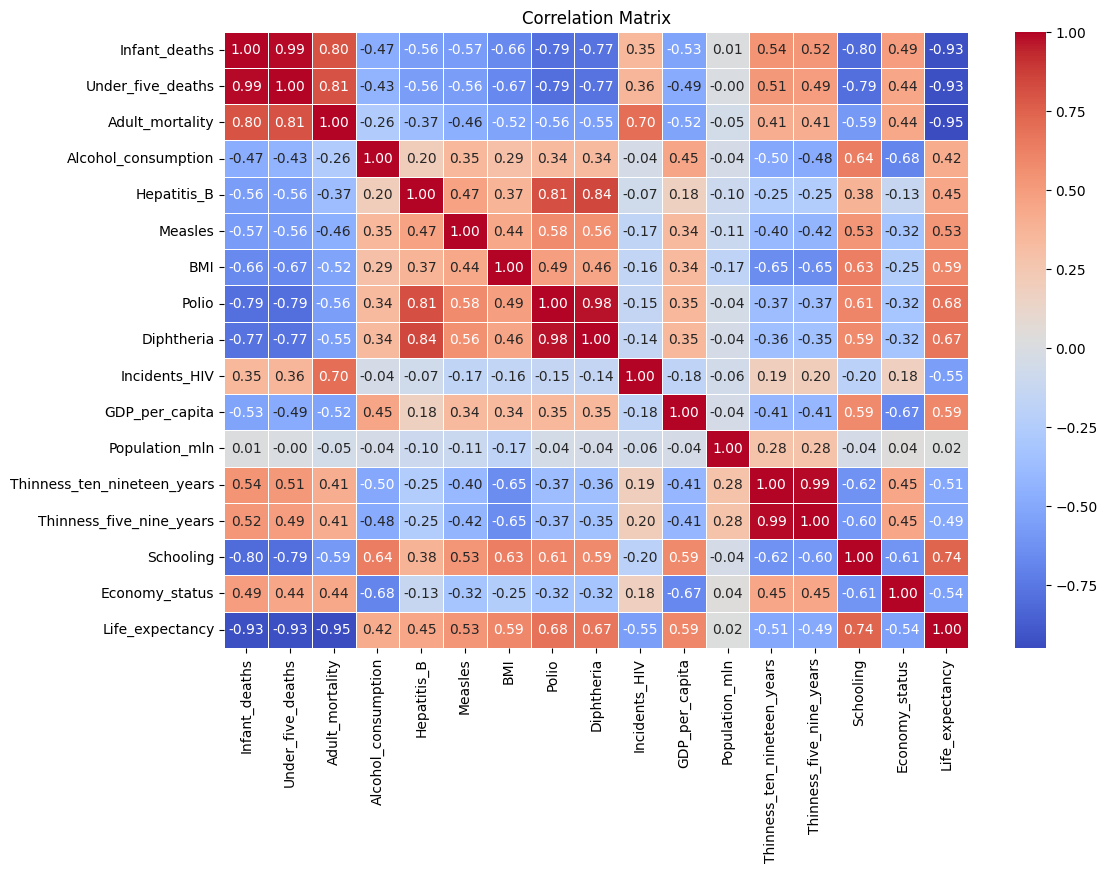

In [95]:
# 상관관계 분석 (Life_expectancy와 연관된 변수 찾기)
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<img width=50% src="./images/heatmap_life_expectancy.png">

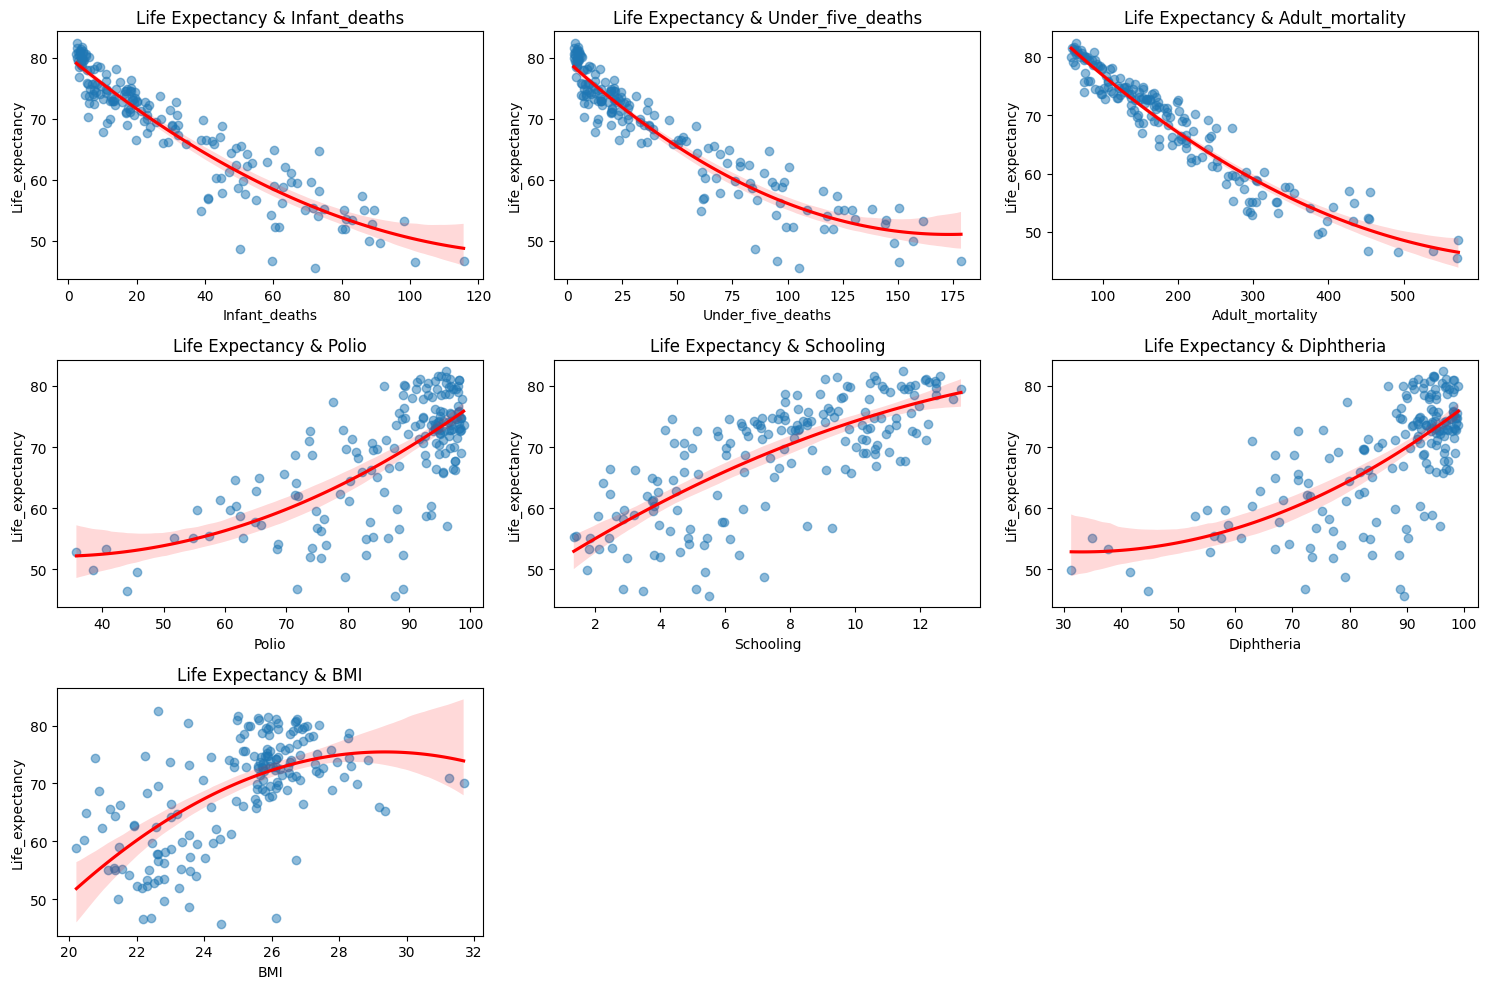

In [96]:
# 기대수명과 주요 변수 간 관계 시각화 (수치가 heatmap기준 절댓값 0.65이상인 변수만 파악)
important_features = ["Infant_deaths", "Under_five_deaths", "Adult_mortality", "Polio", "Schooling", "Diphtheria","BMI"]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features, 1):
    plt.subplot(3, 3, i)
    sns.regplot(
        x=data[feature], 
        y=data['Life_expectancy'],
        order=2,
        scatter_kws={'alpha' : 0.5},
        line_kws={'color' : 'red'}
        )
    plt.title(f"Life Expectancy & {feature}")
plt.tight_layout()
plt.show()

### 결론
- 기대수명에 영향을 주는 요소들을 상관관계 프래프와 산포도를 통해 확인및 검증을 끝냈다.
- 이 데이터를 바탕으로 기본적으로 선형 & 다항회귀 방식을 통해 연속된 값에서 기대 수명을 출력해볼 생각
- 더 정확도를 올리기 위해서 후에 XGBoost, LioghtBoosing 회귀를 통해 정확도를 올려서 학습할 예정

# 3. 데이터 분할

In [97]:
# 특성과 타겟 데이터 분리
X = data.drop('Life_expectancy', axis=1)
y = data['Life_expectancy']

In [98]:
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)


# 4. 정규화

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# 5-1. 기본 선형회귀모델 학습

In [100]:
from sklearn.linear_model import LinearRegression

#모델 학습
li_reg = LinearRegression()
li_reg.fit(X_train,y_train)


LinearRegression()

# 6-1. 예측 및 평가

In [101]:
from sklearn.metrics import mean_squared_error             # MSE (평균 제곱 오차)
from sklearn.metrics import root_mean_squared_error        # RMSE (제곱 평균 제곱근 오차)
from sklearn.metrics import mean_absolute_error            # MAE (평균 절대 오차)
from sklearn.metrics import mean_squared_log_error         # MSLE (평균 제곱 로그 오차)
from sklearn.metrics import root_mean_squared_log_error    # RMSLE (제곱 평균 제곱근 로그 오차)
from sklearn.metrics import r2_score                       # R^2 결정계수

def evaluataion(y_true, y_pred):
    print('mse: ',mean_squared_error(y_true, y_pred))
    print('rmse: ',root_mean_squared_error(y_true, y_pred))
    print('mae: ', mean_absolute_error(y_true, y_pred))
    print('msle: ',mean_squared_log_error(y_true, y_pred))
    print('rmsle: ',root_mean_squared_log_error(y_true, y_pred))
    print('r2_score: ',r2_score(y_true, y_pred))

In [102]:
y_pred = li_reg.predict(X_test)
evaluataion(y_test,y_pred)

mse:  0.9567848724205833
rmse:  0.9781538081613664
mae:  0.7236544175770483
msle:  0.00017682645932727006
rmsle:  0.013297611038350839
r2_score:  0.9871934868127292


# 7-1. 피드백
- 선형 모델을 학습한 결과 msle, rmsle가 0에 수렴하고 $r^2$가 0.95면 데이터 패턴을 잘 학습했다 평가 가능
- mse, rmse의 값이 크고 mae가 0.72인 경우 큰 오차를 가진 예측값에 해당해서 개선이 필요함
### 오차를 줄이기 위해 다른 모델을 시도해볼 생각 XGBOOST 사용해서 오차 점진적 개선

---

# 5-2. XGBoost 모델 학습

In [106]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(   
    n_estimators=500,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
    )

xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# 6-2. 예측 및 평가

In [104]:
y_pred = xgb_reg.predict(X_test)
evaluataion(y_test,y_pred)

mse:  1.3954034590718198
rmse:  1.1812719665986406
mae:  0.9976854536268438
msle:  0.00026096626789708414
rmsle:  0.0161544504052934
r2_score:  0.9813226010200639


# 7. 피드백
- 선형 모델보다 더 오차에 대해 안좋은 결과값이 나왔다.
- 하이퍼 파라미터 튜닝을 통해서 최적의 인자를 찾아보자

---

# 5-2-1. 하이퍼 파라미터 탐색

In [122]:
from sklearn.model_selection import GridSearchCV # type: ignore


param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
xgb_reg = XGBRegressor()
grid_search = GridSearchCV(xgb_reg, param_grid, cv=5)
grid_search.fit(X_train,y_train)

print("Best parameters: ", grid_search.best_params_)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

### 에러... 왜 에러 뜨는거지?? 버전 문제도 아닌데.... 